<a href="https://colab.research.google.com/github/Yoshiki0418/Deep_Learning/blob/main/DL_Lecture1/dataset_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset と Dataloader

In [ ]:
import torchvision
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torch import optim, nn
from torch.nn import functional as F
from torch.utils.data import Dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Dataset

In [ ]:
# datasetsモジュールに様々なモジュールがある
train_dataset = torchvision.datasets.MNIST("./minst_data", train=True, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 49997668.51it/s]


Extracting ./minst_data/MNIST/raw/train-images-idx3-ubyte.gz to ./minst_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1978759.41it/s]

Extracting ./minst_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./minst_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14174726.12it/s]


Extracting ./minst_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./minst_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8048385.62it/s]

Extracting ./minst_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./minst_data/MNIST/raw



In [ ]:
# 変数にでデータが格納されているのではない
import sys
sys.getsizeof(train_dataset)

48

In [ ]:
image, label = train_dataset[0]
print(label)
image

5


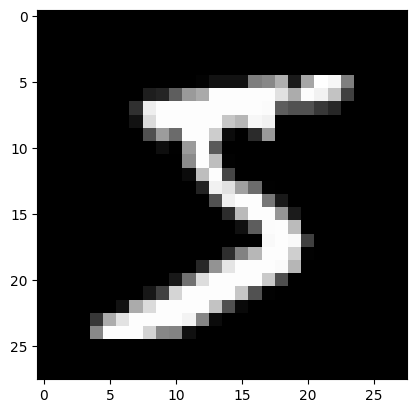

In [ ]:
plt.imshow(image, cmap="gray")

In [ ]:
len(train_dataset)

60000

In [ ]:
# .ToTensor()
# PIL(Numpy Array)形式のデータをTensor形式のデータに変換する：--> スケールも0~1になる
image_tensor = transforms.ToTensor()(image)

In [ ]:
type(image_tensor)

torch.Tensor

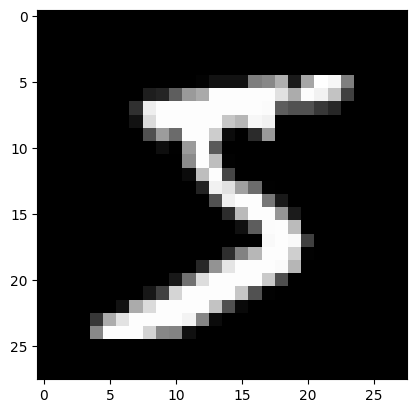

In [ ]:
plt.imshow(image_tensor[0], cmap="gray")

In [ ]:
# .Normalize()
# 0.5を引いて0.5で割ることで、0~1のデータを-1から1にする
# -1 ~ 1 にする ---->. 平均を0にすることで学習の効率を上げる
normalized_image_tensor = transforms.Normalize((0.5, ), (0.5, ))(image_tensor)
print(normalized_image_tensor.min(), normalized_image_tensor.max())

tensor(-1.) tensor(1.)


In [ ]:
# Composeを使うことで、複数のTransformを直列にまとめてくれる。 ---> これをDatasetのインスタンス生成時に指定する
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
    ])

transformed_image = transform(image)

In [ ]:
transformed_image.shape

torch.Size([1, 28, 28])

In [ ]:
# datasetのtransform引数に入れて使用してみる
train_dataset = torchvision.datasets.MNIST("./mnist_data", train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.MNIST("./mnist_data", train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 49567298.00it/s]


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1826010.25it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13597096.90it/s]


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2458132.74it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



In [ ]:
image, label = train_dataset[0]
image.shape

torch.Size([1, 28, 28])

## Dataloader

In [ ]:
# DatasetからDataloaderを作成する
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

In [ ]:
images, labels = next(iter(train_loader))

print(images.shape)

grid_images = torchvision.utils.make_grid(images)
print(grid_images.shape)

torch.Size([32, 1, 28, 28])
torch.Size([3, 122, 242])


tensor([4, 3, 5, 9, 0, 1, 5, 2, 3, 4, 2, 0, 2, 9, 8, 1, 0, 3, 3, 9, 7, 1, 2, 1,
        0, 7, 6, 8, 1, 7, 2, 4])


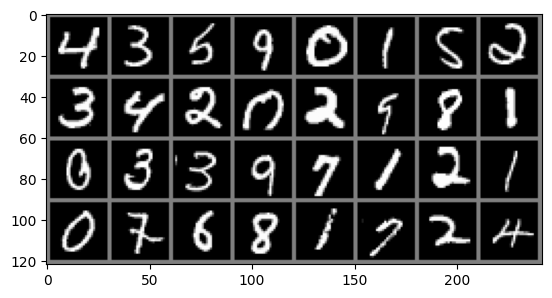

In [ ]:
print(labels)

grid_images = grid_images / 2 + 0.5
plt.imshow(grid_images.permute(1, 2, 0))

## DataLoaderを学習ループで使用する

In [ ]:
# 入力が[batch, ch, h, w]なので、[batch, chzhxw]にするためにnn.Flatten()を追加
class MLP(nn.Module):
    def __init__(self, input_dim, hid_dim, out_dim):
        super().__init__()
        self.flatten = nn.Flatten()
        self.block = nn.Sequential(
            nn.Linear(input_dim, hid_dim),
            nn.ReLU(),
            nn.Linear(hid_dim, out_dim)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.block(x)
        return x

In [32]:
learning_rate = 0.01
epochs = 5
model = MLP(28*28, 30, 10)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
# ログ
train_losses = []
val_losses = []
val_accuracies = []

# 学習
for epoch in range(epochs):
    running_loss = 0.0
    running_val_loss = 0.0
    running_val_acc = 0.0

    for train_batch, data in enumerate(train_loader):
        X, y = data
        optimizer.zero_grad()

        # forward
        y_pred = model(X)
        loss = F.cross_entropy(y_pred, y)
        running_loss += loss.item()

        # backward
        loss.backward()
        optimizer.step()

    # val
    with torch.no_grad():
        for val_batch, data in enumerate(val_loader):
            X_val, y_val = data
            preds_val = model(X_val)
            val_loss = F.cross_entropy(preds_val, y_val)
            running_val_loss += val_loss.item()
            val_accuracy = torch.sum(torch.argmax(preds_val, dim=-1) == y_val) / y_val.shape[0]
            running_val_acc += val_accuracy.item()

    train_losses.append(running_loss/(train_batch + 1))
    val_losses.append(running_val_loss/(val_batch + 1))
    val_accuracies.append(running_val_acc/(val_batch + 1))
    print(f'epoch: {epoch}: train error: {train_losses[-1]}, validation error: {val_losses[-1]}, validation accuracy: {val_accuracies[-1]}')

epoch: 0: train error: 0.290522593998909, validation error: 0.26932704152045445, validation accuracy: 0.9212260383386581
epoch: 1: train error: 0.2650572014570236, validation error: 0.2573871066311773, validation accuracy: 0.9268170926517572
epoch: 2: train error: 0.24243020369410515, validation error: 0.23841937680463918, validation accuracy: 0.9294129392971247
epoch: 3: train error: 0.22353293851613998, validation error: 0.2165227183036673, validation accuracy: 0.9377995207667732
epoch: 4: train error: 0.20650259888569514, validation error: 0.19967992188551795, validation accuracy: 0.9408945686900958


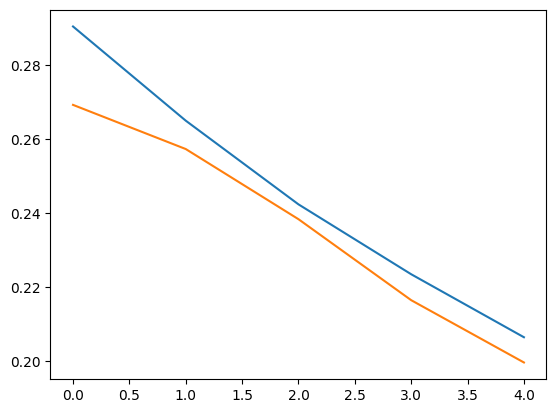

In [36]:
plt.plot(train_losses)
plt.plot(val_losses)

## カスタムのデータセットを作成する

In [38]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
            X = self.transform(X)
        return X, y

In [53]:
dataset = datasets.load_digits()
X = dataset["images"]
y = dataset["target"]

#. X.shape ---> (150, 4)
#. y.shape ---> (150,)

# ToTensorを使うため、0~255にする
X = X * (255. / 16.) #0~16. --> 0~255
X = X.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train.shape ---> (1437, 8, 8)
# y_train.shape ---> (1437,)

In [56]:
train_mydataset = MyDataset(X_train, y_train)

In [59]:
# __len__
print(len(train_mydataset))

# __getitem__
image, label = train_mydataset[0]
print(image.shape)
print(label)

1437
(8, 8)
6


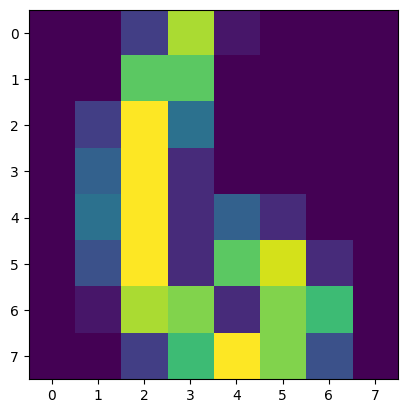

In [60]:
# データ可視化
plt.imshow(image)

In [61]:
# transform
transform = transforms.Compose([
    transforms.ToTensor(),# 0~255 -> 0~1
    transforms.Normalize((.5, ), (.5, )) # 0~1 -> -1~1
])
train_mydataset = MyDataset(X_train, y_train, transform=transform)
val_mydataset = MyDataset(X_val, y_val, transform=transform)
train_myloader = DataLoader(train_mydataset, batch_size=10, shuffle=True, num_workers=2)
val_myloader = DataLoader(val_mydataset, batch_size=10, num_workers=2)
images, labels = next(iter(train_myloader))

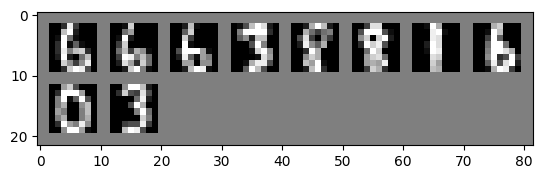

In [62]:
grid_images = torchvision.utils.make_grid(images)
grid_images = grid_images / 2 + 0.5
plt.imshow(torch.permute(grid_images, (1, 2, 0)))